In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations

In [2]:
df_diciembre = pd.read_csv('grafo_gestion_diciembre_2023.csv')

In [3]:
print(df_diciembre.shape)

(52260, 8)


In [4]:
df_diciembre.head()

,session_id,idnota,category,subcategory,type_content,author,title,content_length
0,1850871207.16854595651702385199,PILDULOUEJAWTNLSNPJDPSGD3M,Mix,Respuestas,free,Noé Yactayo,"Temblor en Rep. Dominicana hoy, 13/12/2023 – ú...",1942
1,1111009370.16961616161703521627,SR2OJ5GBZ5BAXP4EI5J5QLU3QM,Mix,Respuestas,free,Claudia Cuba,"Temblor en Rep. Dominicana hoy, 26 de diciembr...",1805
2,1111009370.16961616161702555226,DGWODY2UHZD3HJRHEWLB2ZHBPI,Mix,Respuestas,free,Ronie Bautista,¿Cómo cobrar la Pensión Bienestar en cualquier...,2784
3,1953334303.16448483701702903325,IA4UAYEDDJDUBNEWDUUR6DA2CQ,Mundo,Mundo,metered,Agencia AP,Chile rechaza por segunda vez cambiar su const...,8518
4,1930832325.16926550591702930841,IA4UAYEDDJDUBNEWDUUR6DA2CQ,Mundo,Mundo,metered,Agencia AP,Chile rechaza por segunda vez cambiar su const...,8518


# Buscando las Combinaciones

## Identificanco las sesiones

In [5]:
df_sesiones = df_diciembre[['session_id']]
df_sesiones.shape

(52260, 1)

In [6]:
df_sesiones.drop_duplicates()

,session_id
0,1850871207.16854595651702385199
1,1111009370.16961616161703521627
2,1111009370.16961616161702555226
3,1953334303.16448483701702903325
4,1930832325.16926550591702930841
...,...
52249,106869332.17017480651701748064
52250,1100255300.16562807201701944552
52251,567953308.16073079441701691577
52252,1004723385.16971668951701690212


## Identificar las notas de cada sesión

In [7]:
lista = []

for index, row in df_sesiones.iterrows():
    #print(index," - ",row['session_id'])    
    notas=[]
    for i, x in df_diciembre[df_diciembre['session_id']==row['session_id']].iterrows():        
        #print(x['idnota'])
        notas.append(x['idnota'])      
    #lista[index]
    #print(notas)
    #print(len(notas))
    if (len(notas)) >= 5:
        lista.append(notas)
#print(lista)

In [8]:
len(lista)

5623

## Obteniendo las Combinaciones de noticias

In [9]:
def contar_combinaciones_en_pares(lista_de_listas):
    # Creamos un diccionario para contar la frecuencia de cada par
    frecuencia_pares = {}
    
    # Iteramos sobre cada lista en la lista de listas
    for lista in lista_de_listas:
        # Generamos todas las combinaciones en pares de la lista actual
        pares = list(combinations(lista, 2))
        
        # Actualizamos la frecuencia de cada par en el diccionario
        for par in pares:
            if par in frecuencia_pares:
                frecuencia_pares[par] += 1
            else:
                frecuencia_pares[par] = 1
    
    return frecuencia_pares

In [10]:
frecuencia_pares = contar_combinaciones_en_pares(lista)
print("numero de pares (aristas): ",len(frecuencia_pares))

numero de pares (aristas):  23244


In [11]:
# Convertir el diccionario en una lista de tuplas
lista_tuplas = [(x[0], x[1], y) for x, y in frecuencia_pares.items()]

# Crear el DataFrame
df_final = pd.DataFrame(lista_tuplas, columns=['Source', 'Target', 'Peso'])

# Imprimir el DataFrame resultante
df_final.head()

,Source,Target,Peso
0,PILDULOUEJAWTNLSNPJDPSGD3M,KBWZVTG5R5CMZNWC5AR3IUJV5Y,13
1,PILDULOUEJAWTNLSNPJDPSGD3M,F2FONMR65JAUNFL3ETG3NDQ7BM,13
2,PILDULOUEJAWTNLSNPJDPSGD3M,NSRCDVPM4JE2PM6NAJC6ATVXRE,13
3,PILDULOUEJAWTNLSNPJDPSGD3M,ANTCUUXESJDGNBA2VJZGD7ZYMU,13
4,PILDULOUEJAWTNLSNPJDPSGD3M,6WDHMRW73JAJPFDAXKCT7C5ARY,13


In [12]:
edges_df = df_final[df_final['Source'] != df_final['Target']]

In [13]:
edges_df

,Source,Target,Peso
0,PILDULOUEJAWTNLSNPJDPSGD3M,KBWZVTG5R5CMZNWC5AR3IUJV5Y,13
1,PILDULOUEJAWTNLSNPJDPSGD3M,F2FONMR65JAUNFL3ETG3NDQ7BM,13
2,PILDULOUEJAWTNLSNPJDPSGD3M,NSRCDVPM4JE2PM6NAJC6ATVXRE,13
3,PILDULOUEJAWTNLSNPJDPSGD3M,ANTCUUXESJDGNBA2VJZGD7ZYMU,13
4,PILDULOUEJAWTNLSNPJDPSGD3M,6WDHMRW73JAJPFDAXKCT7C5ARY,13
...,...,...,...
23239,QONDOOOUXJE4PBBVZ2JUEDXXZY,BRXAULA4WFA75H4NQUV4S7SFNI,7
23240,QONDOOOUXJE4PBBVZ2JUEDXXZY,F5QXDHC6WRFPXFCQYYRJETG3HI,7
23241,KDPMLSUDQVFUPPN37BQJCBYI2I,BRXAULA4WFA75H4NQUV4S7SFNI,7
23242,KDPMLSUDQVFUPPN37BQJCBYI2I,F5QXDHC6WRFPXFCQYYRJETG3HI,7


# Identificando los nodos

In [14]:
datos_unicos = pd.concat([df_final['Source'], df_final['Target']]).unique()
list(datos_unicos)
print(len(datos_unicos))

1862


In [15]:
nodos_df = pd.DataFrame(datos_unicos, columns=['idnota'])
nodos_df.shape

(1862, 1)

In [16]:
nodos_df.drop_duplicates()

,idnota
0,PILDULOUEJAWTNLSNPJDPSGD3M
1,KBWZVTG5R5CMZNWC5AR3IUJV5Y
2,F2FONMR65JAUNFL3ETG3NDQ7BM
3,NSRCDVPM4JE2PM6NAJC6ATVXRE
4,ANTCUUXESJDGNBA2VJZGD7ZYMU
...,...
1857,MFZFRBDQ5RDPPFBYEVKF2RATQ4
1858,KTUHVPRXLBHQZJIRHQM3BPZ4FA
1859,2DL7IUUXV5EFNMFEGNR4SPUNP4
1860,YJMNXJWY3NCCVPBLVWVMAKIMYU


In [17]:
#agregar atributos a los nodos desde el dataframe original
atributos = df_diciembre[['idnota','category','subcategory','type_content','author','title','content_length']]
atributos.shape

(52260, 7)

In [18]:
#las notas unicas con atributos
notas = atributos.drop_duplicates()

In [19]:
nodos_df2 = nodos_df.merge(notas, how="left", on="idnota")

In [20]:
nodos_df2

,idnota,category,subcategory,type_content,author,title,content_length
0,PILDULOUEJAWTNLSNPJDPSGD3M,Mix,Respuestas,free,Noé Yactayo,"Temblor en Rep. Dominicana hoy, 13/12/2023 – ú...",1942
1,KBWZVTG5R5CMZNWC5AR3IUJV5Y,Mix,Respuestas,free,Claudia Cuba,"Temblor en Puerto Rico, 15/12/2023: hora, magn...",2523
2,F2FONMR65JAUNFL3ETG3NDQ7BM,Mix,Respuestas,free,Ronie Bautista,¿Qué artículos debe contener tu mochila de eme...,4692
3,NSRCDVPM4JE2PM6NAJC6ATVXRE,Mix,Respuestas,free,Sergio Valzania,"Temblor en Guatemala hoy, 12de diciembre: nue...",879
4,ANTCUUXESJDGNBA2VJZGD7ZYMU,Mix,Respuestas,free,Claudia Cuba,"Temblor en México hoy, 13 de diciembre: report...",5002
...,...,...,...,...,...,...,...
1857,MFZFRBDQ5RDPPFBYEVKF2RATQ4,Peru,Peru,metered,Redacción Gestión,Fonavi: este es el link para saber si eres ben...,2385
1858,KTUHVPRXLBHQZJIRHQM3BPZ4FA,Peru,Politica,free,Redacción Gestión,PJ ordena a la PCM emitir la declaratoria de e...,2763
1859,2DL7IUUXV5EFNMFEGNR4SPUNP4,Economia,Empresas,free,Dagiana Peves,Air Transat inaugura vuelos directos para cone...,1626
1860,YJMNXJWY3NCCVPBLVWVMAKIMYU,Peru,Peru,metered,Redacción Gestión,Fenómeno El Niño: Ingemmet revela las zonas cr...,5872


## Contruyendo el Grafo

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
gestion = nx.Graph()

In [23]:
#añadir nodos
for idx, row in nodos_df2.iterrows():
    #elcomercio.add_node(row['idnota'])
    gestion.add_node(row['idnota'], categoria=row['category'], 
                        subcategoria=row['subcategory'],
                        tipo_contenido =row['type_content'],
                        autor = row['author'],
                        titulo = row['title'],
                        caracteres = row['content_length'])

In [24]:
#añadir edge
for idx, row in edges_df.iterrows():
    gestion.add_edge(row['Source'], row['Target'], peso=row['Peso'])

In [25]:
print(gestion.number_of_nodes())
print(gestion.number_of_edges())

1862
21517


## Dibujando el grafo

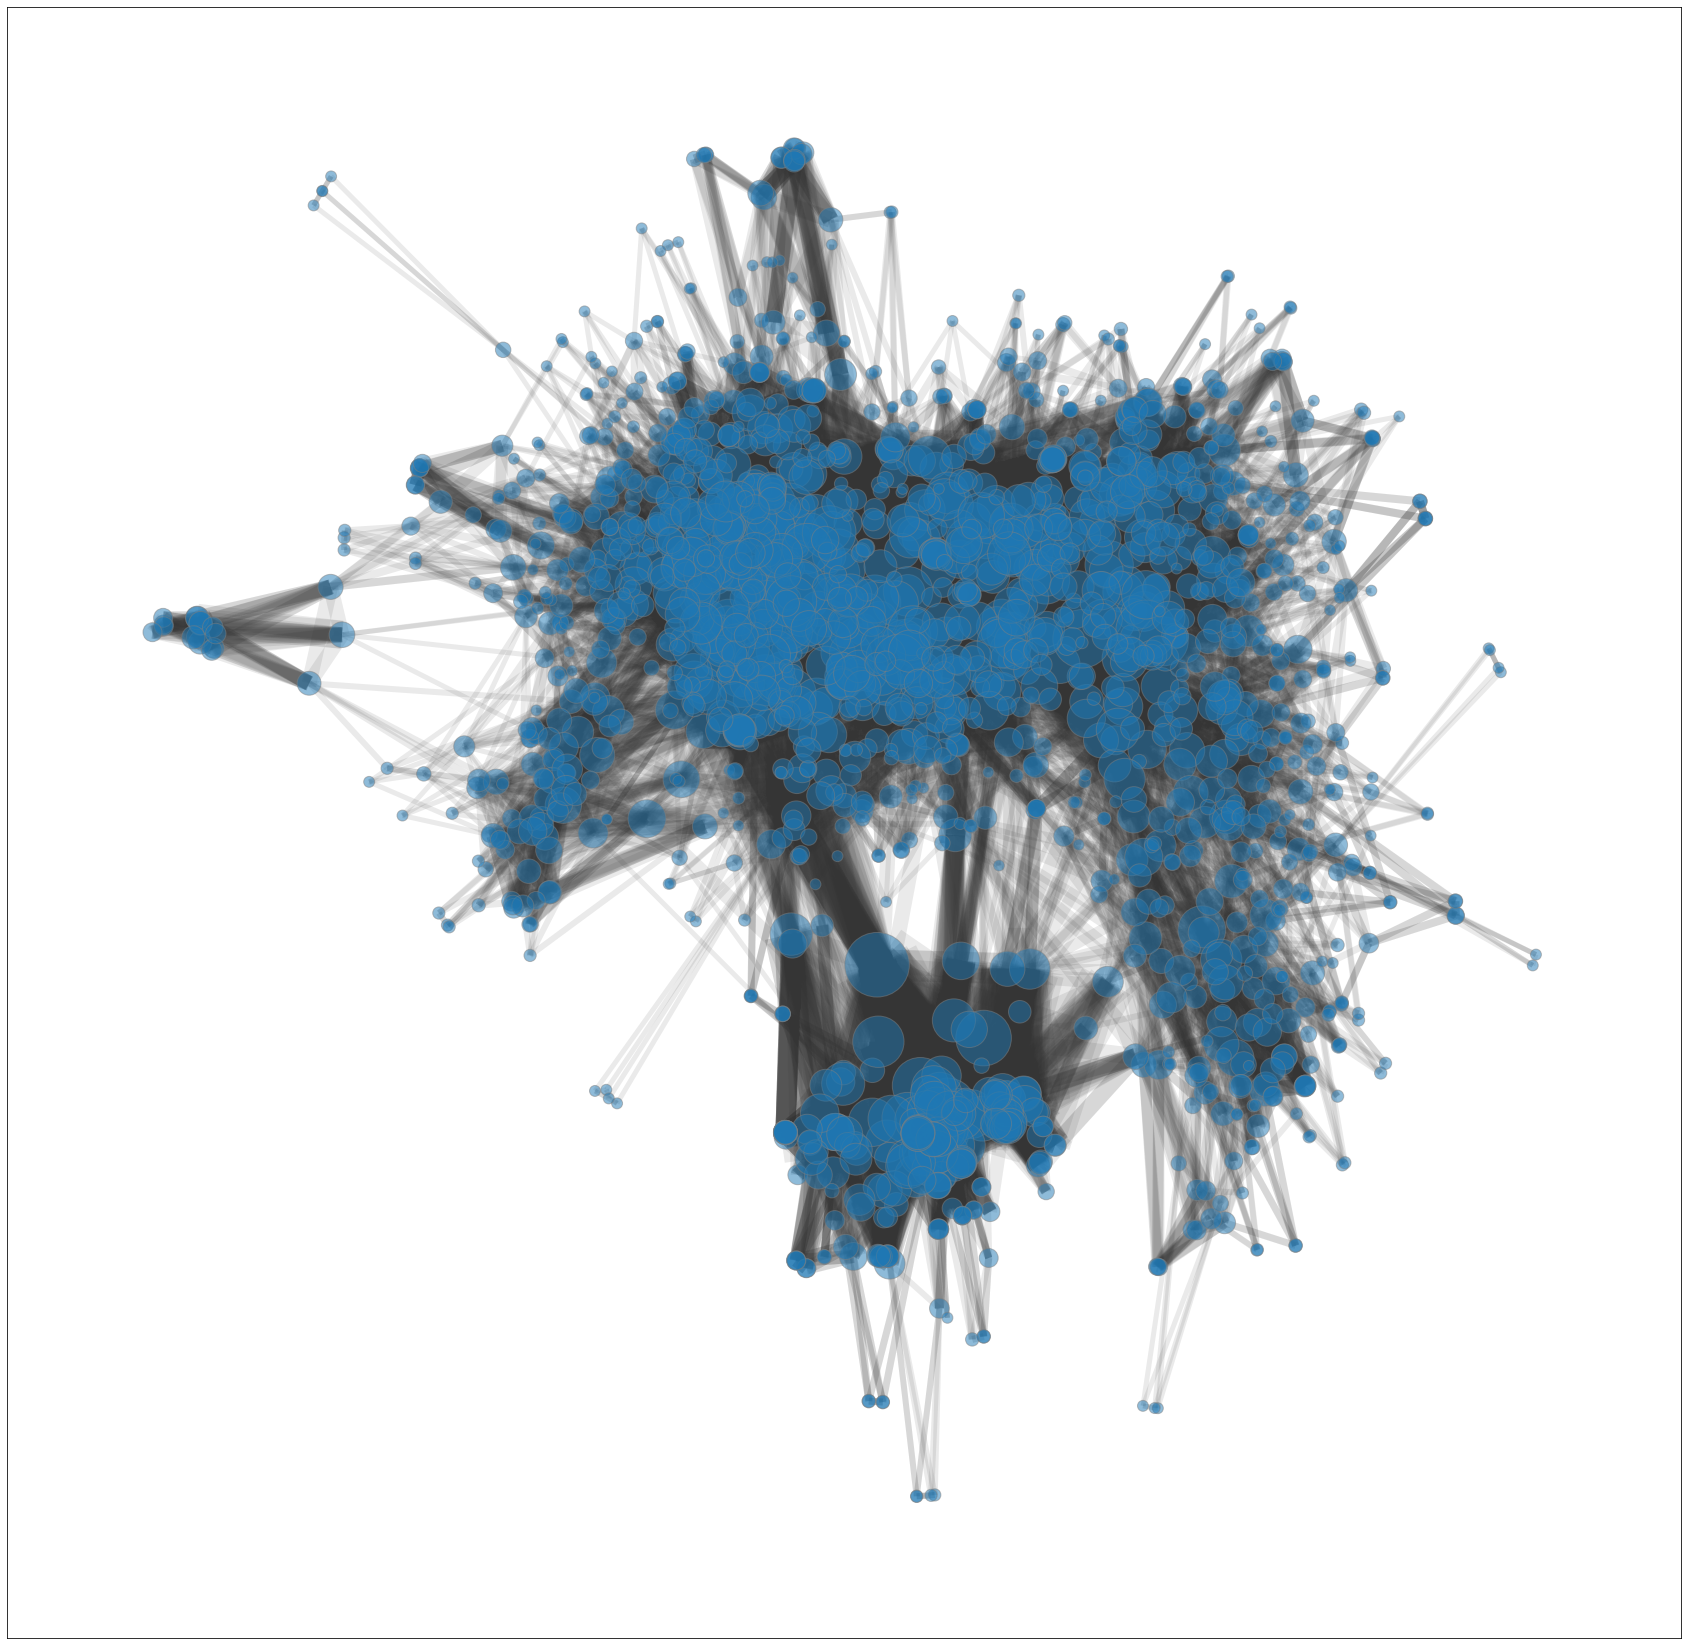

In [26]:
plt.figure(figsize=(30,30))
pos = nx.spring_layout(gestion,seed=30)

# Dibujar los pesos 
pesos = nx.get_edge_attributes(gestion, 'peso')
pesos_lista = [(pesos[e]) for e in gestion.edges()]

nx.draw_networkx_edges(gestion,pos,alpha=0.1,width=pesos_lista, edge_color='#353535')

# Obtener el grado de cada nodo
degrees = dict(gestion.degree)
nx.draw_networkx_nodes(gestion,pos,node_size=[v * 30 for v in degrees.values()],alpha=0.5,edgecolors="grey")

plt.savefig('grafo_gestion_noticias.png', dpi=180)


In [27]:
nx.write_graphml(gestion,'gestion.graphml')